# Load Testing for Benchmarking (Golang Fiber, Laravel, Node Js Express)

## Project Details

This project benchmarks the load performance of four different backend frameworks using identical database queries and infrastructure. The frameworks tested are:

- **Laravel (Query Builder)**
- **Laravel with FrankenPHP (Query Builder)**
- **Node.js Express**
- **Golang (Fiber)**

All frameworks connect to the same database and execute the same SQL queries to ensure a fair comparison.

### Test Scenarios

Each framework is tested under four scenarios:

1. **/cek API, 100 VUs**  
    Simple endpoint hit (`/cek`) with 100 virtual users (VUs), no database query.

2. **/cek API, 1,000 VUs**  
    Simple endpoint hit (`/cek`) with 10,000 VUs, no database query.

3. **/data/10 API, 100 VUs**  
    Endpoint (`/data/10`) fetching 10 datas from four joined tables with 100 VUs.

4. **/data/100 API, 100 VUs**  
    Endpoint (`/data/100`) fetching 100 datas from four joined tables with 100 VUs.

5. **/data/1000 API, 100 VUs**  
    Endpoint (`/data/1000`) fetching 1000 datas from four joined tables with 100 VUs.

6. **/data/1000 API, 1000 VUs**  
    Endpoint (`/data/1000`) fetching 1000 datas from four joined tables with 1000 VUs.

All tests are performed using the same SQL and database to ensure consistency and comparability across frameworks.

### SQL

```sql
SELECT epc_lists.tag_id, linen_types.linen_type_name
FROM linen_lists
LEFT JOIN epc_lists ON linen_lists.epc_list_id = epc_lists.id
LEFT JOIN registrations ON linen_lists.registration_id = registrations.id
LEFT JOIN linen_types ON registrations.linen_type_id = linen_types.id
WHERE linen_lists.deleted_at IS NULL
ORDER BY RAND()
LIMIT {count};
```

### Import all python data dependency

In [1]:
!pip install pandas
!pip install matplotlib
!pip install tabulate

In [2]:
import subprocess
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

### Create K6 Test Runner

In [3]:
def run_k6_test(url, vus, duration, scenario_name):
    script_path = "./test_runner.js"
    summary_path = f"./summaries/{scenario_name}.json"

    assert os.path.exists(script_path), "K6 script not found!"

    subprocess.run([
        "k6", "run", script_path,
        f"--summary-export={summary_path}",
        f"--env", f"URL={url}",
        f"--env", f"VUS={vus}",
        f"--env", f"DURATION={duration}"
    ], check=True)
    print(f"K6 test for {scenario_name} completed. Summary saved to {summary_path}")

## Load Test

### Laravel (Query Builder) Scenarios

In [4]:
laravel_scenarios = [
    {"url": "http://localhost:5000/api/cek", "vus": 100, "duration": "10s", "name": "laravel_cek_100vu"},
    {"url": "http://localhost:5000/api/cek", "vus": 1000, "duration": "10s", "name": "laravel_cek_1000vu"},
    {"url": "http://localhost:5000/api/data/10", "vus": 100, "duration": "10s", "name": "laravel_data10_100vu"},
    {"url": "http://localhost:5000/api/data/1000", "vus": 1000, "duration": "10s", "name": "laravel_data1000_1000vu"},
]

for sc in laravel_scenarios:
    run_k6_test(sc["url"], sc["vus"], sc["duration"], sc["name"])


          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ./test_runner.js
     output: -

  scenarios: (100.00%) 1 scenario, 100 max VUs, 40s max duration (incl. graceful stop):
           * default: 100 looping VUs for 10s (gracefulStop: 30s)


running (01.0s), 100/100 VUs, 113 complete and 0 interrupted iterations
default   [  10% ] 100 VUs  01.0s/10s

running (02.0s), 100/100 VUs, 270 complete and 0 interrupted iterations
default   [  20% ] 100 VUs  02.0s/10s

running (03.0s), 100/100 VUs, 416 complete and 0 interrupted iterations
default   [  30% ] 100 VUs  03.0s/10s

running (04.0s), 100/100 VUs, 566 complete and 0 interrupted iterations
default   [  40% ] 100 VUs  04.0s/10s

running (05.0s), 100/100 VUs, 717 complete and 0 interrupted iterations
default   [  50% ] 100 VUs  05.0s/10s

running (06.0s), 100/100 VUs, 

### Laravel FrankenPHP (Query Builder) Scenarios

In [5]:
frankenphp_scenarios = [
    {"url": "http://localhost:8000/api/cek", "vus": 100, "duration": "10s", "name": "frankenphp_cek_100vu"},
    {"url": "http://localhost:8000/api/cek", "vus": 1000, "duration": "10s", "name": "frankenphp_cek_1000vu"},
    {"url": "http://localhost:8000/api/data/10", "vus": 100, "duration": "10s", "name": "frankenphp_data10_100vu"},
    {"url": "http://localhost:8000/api/data/1000", "vus": 1000, "duration": "10s", "name": "frankenphp_data1000_1000vu"},
]

for sc in frankenphp_scenarios:
    run_k6_test(sc["url"], sc["vus"], sc["duration"], sc["name"])


          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ./test_runner.js
     output: -

  scenarios: (100.00%) 1 scenario, 100 max VUs, 40s max duration (incl. graceful stop):
           * default: 100 looping VUs for 10s (gracefulStop: 30s)


running (01.0s), 100/100 VUs, 119 complete and 0 interrupted iterations
default   [  10% ] 100 VUs  01.0s/10s

running (02.0s), 100/100 VUs, 275 complete and 0 interrupted iterations
default   [  20% ] 100 VUs  02.0s/10s

running (03.0s), 100/100 VUs, 432 complete and 0 interrupted iterations
default   [  30% ] 100 VUs  03.0s/10s

running (04.0s), 100/100 VUs, 587 complete and 0 interrupted iterations
default   [  40% ] 100 VUs  04.0s/10s

running (05.0s), 100/100 VUs, 750 complete and 0 interrupted iterations
default   [  50% ] 100 VUs  05.0s/10s

running (06.0s), 100/100 VUs, 

### Node Js Scenarios

In [6]:
node_scenarios = [
    {"url": "http://localhost:3000/cek", "vus": 100, "duration": "10s", "name": "node_cek_100vu"},
    {"url": "http://localhost:3000/cek", "vus": 1000, "duration": "10s", "name": "node_cek_1000vu"},
    {"url": "http://localhost:3000/data/10", "vus": 100, "duration": "10s", "name": "node_data10_100vu"},
    {"url": "http://localhost:3000/data/1000", "vus": 1000, "duration": "10s", "name": "node_data1000_1000vu"},
]

for sc in node_scenarios:
    run_k6_test(sc["url"], sc["vus"], sc["duration"], sc["name"])


          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ./test_runner.js
     output: -

  scenarios: (100.00%) 1 scenario, 100 max VUs, 40s max duration (incl. graceful stop):
           * default: 100 looping VUs for 10s (gracefulStop: 30s)


running (01.0s), 100/100 VUs, 3376 complete and 0 interrupted iterations
default   [  10% ] 100 VUs  01.0s/10s

running (02.0s), 100/100 VUs, 8969 complete and 0 interrupted iterations
default   [  20% ] 100 VUs  02.0s/10s

running (03.0s), 100/100 VUs, 15128 complete and 0 interrupted iterations
default   [  30% ] 100 VUs  03.0s/10s

running (04.0s), 100/100 VUs, 21426 complete and 0 interrupted iterations
default   [  40% ] 100 VUs  04.0s/10s

running (05.0s), 100/100 VUs, 27564 complete and 0 interrupted iterations
default   [  50% ] 100 VUs  05.0s/10s

running (06.0s), 100/1

### Golang Scenarios

In [19]:
golang_scenarios = [
    {"url": "http://localhost:4000/cek", "vus": 100, "duration": "10s", "name": "golang_cek_100vu"},
    {"url": "http://localhost:4000/cek", "vus": 1000, "duration": "10s", "name": "golang_cek_1000vu"},
    {"url": "http://localhost:4000/data/10", "vus": 100, "duration": "10s", "name": "golang_data10_100vu"},
    {"url": "http://localhost:4000/data/1000", "vus": 1000, "duration": "10s", "name": "golang_data1000_1000vu"},
]

for sc in golang_scenarios:
    run_k6_test(sc["url"], sc["vus"], sc["duration"], sc["name"])


          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ./test_runner.js
     output: -

  scenarios: (100.00%) 1 scenario, 100 max VUs, 40s max duration (incl. graceful stop):
           * default: 100 looping VUs for 10s (gracefulStop: 30s)


running (01.0s), 100/100 VUs, 45513 complete and 0 interrupted iterations
default   [  10% ] 100 VUs  01.0s/10s

running (02.0s), 100/100 VUs, 93217 complete and 0 interrupted iterations
default   [  20% ] 100 VUs  02.0s/10s

running (03.0s), 100/100 VUs, 141552 complete and 0 interrupted iterations
default   [  30% ] 100 VUs  03.0s/10s

running (04.0s), 100/100 VUs, 190193 complete and 0 interrupted iterations
default   [  40% ] 100 VUs  04.0s/10s

running (05.0s), 100/100 VUs, 240291 complete and 0 interrupted iterations
default   [  50% ] 100 VUs  05.0s/10s

running (06.0s), 

## Datas

### Comparison Tables

In [20]:
summary_dir = "./summaries"

files = [f for f in os.listdir(summary_dir) if f.endswith(".json")]

rows = []

for file in files:
    with open(os.path.join(summary_dir, file)) as f:
        data = json.load(f)

    name = file.replace(".json", "")
    parts = name.split("_", 1)
    framework = parts[0]
    scenario = parts[1] if len(parts) > 1 else "unknown"

    metrics = data["metrics"]

    http_reqs = metrics["http_reqs"]["count"]
    reqs_per_sec = metrics["http_reqs"]["rate"]
    duration_sec = http_reqs / reqs_per_sec if reqs_per_sec else 0

    avg_duration = metrics["http_req_duration"]["avg"]
    p95_duration = metrics["http_req_duration"]["p(95)"]

    check_passes = metrics["checks"]["passes"]
    check_fails = metrics["checks"]["fails"]
    check_total = check_passes + check_fails

    check_pass_rate = (check_passes / check_total * 100) if check_total else 0
    check_fail_rate = (check_fails / check_total * 100) if check_total else 0

    row = {
        "Scenario": scenario,
        "Framework": framework,
        "Req": http_reqs,
        "RPs": round(reqs_per_sec, 2),
        "Req Durations avg (ms)": round(avg_duration, 2),
        "Req Durations p95 (ms)": round(p95_duration, 2),
        "Success Rate (%)": round(check_pass_rate, 2),
        "Fail Rate (%)": round(check_fail_rate, 2),
        "Checks": f"{check_passes} / {check_total}",
    }

    rows.append(row)

df = pd.DataFrame(rows)
df = df.sort_values(by=["Framework", "Scenario"])

framework_order = ["laravel", "frankenphp", "node", "golang"]
scenario_order = ["cek_100vu", "cek_1000vu", "data10_100vu", "data1000_1000vu"]

df["Framework"] = pd.Categorical(df["Framework"], categories=framework_order, ordered=True)
df["Scenario"] = pd.Categorical(df["Scenario"], categories=scenario_order, ordered=True)

df_sorted = df.sort_values(["Framework", "Scenario"])

print(df_sorted.to_markdown(index=False))

| Scenario        | Framework   |    Req |      RPs |   Req Durations avg (ms) |   Req Durations p95 (ms) |   Success Rate (%) |   Fail Rate (%) | Checks          |
|:----------------|:------------|-------:|---------:|-------------------------:|-------------------------:|-------------------:|----------------:|:----------------|
| cek_100vu       | laravel     |   1568 |   147.16 |                   657.92 |                   716.73 |                100 |               0 | 1568 / 1568     |
| cek_1000vu      | laravel     |   2580 |   156.46 |                  5080.57 |                  6421.88 |                100 |               0 | 2580 / 2580     |
| data10_100vu    | laravel     |     61 |     1.52 |                 20188.4  |                 37498.8  |                100 |               0 | 61 / 61         |
| data1000_1000vu | laravel     |     10 |     0.25 |                 36452.7  |                 39108.7  |                100 |               0 | 10 / 10         |
| cek_100v

### Avg Request Duration per Scenario

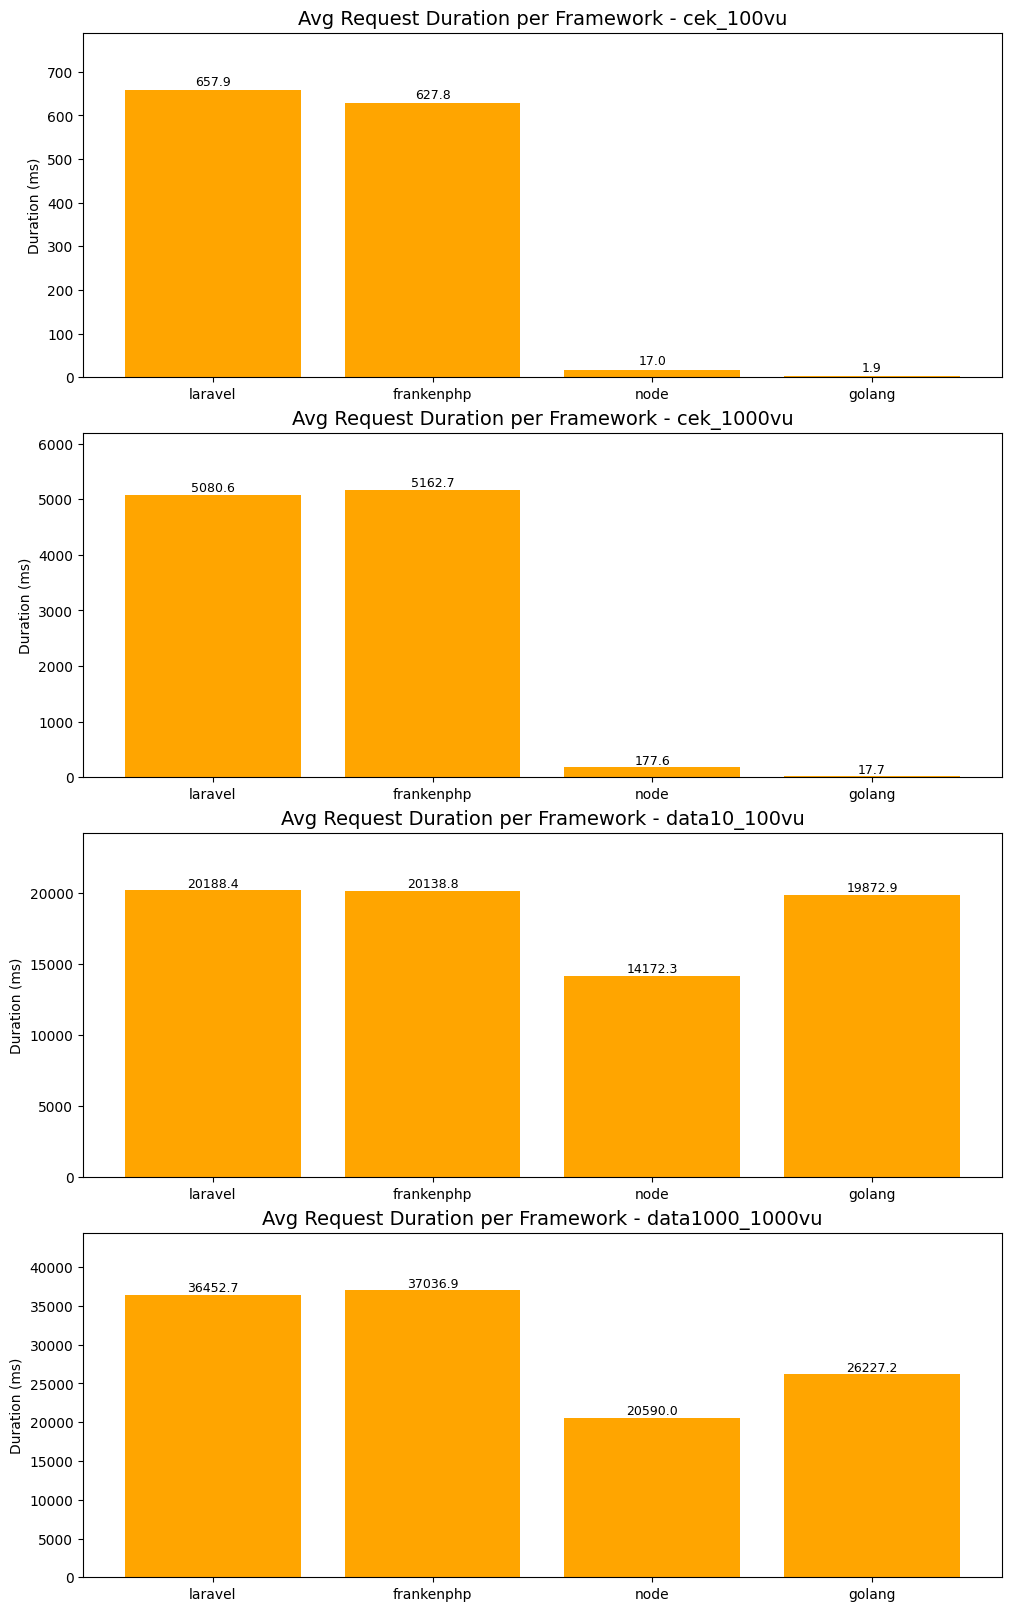

In [21]:
scenarios = df_sorted["Scenario"].cat.categories
rows = len(scenarios)
cols = 1

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), constrained_layout=True)

for i, scenario in enumerate(scenarios):
    ax = axes[i] if rows > 1 else axes
    subset = df_sorted[df_sorted["Scenario"] == scenario]
    bars = ax.bar(subset["Framework"], subset["Req Durations avg (ms)"], color="orange")

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.1f}", ha='center', va='bottom', fontsize=9)

    ax.set_title(f"Avg Request Duration per Framework - {scenario}", fontsize=14)
    ax.set_ylabel("Duration (ms)")
    ax.set_ylim(0, max(subset["Req Durations avg (ms)"]) * 1.2)

plt.show()


### RPs per Scenario

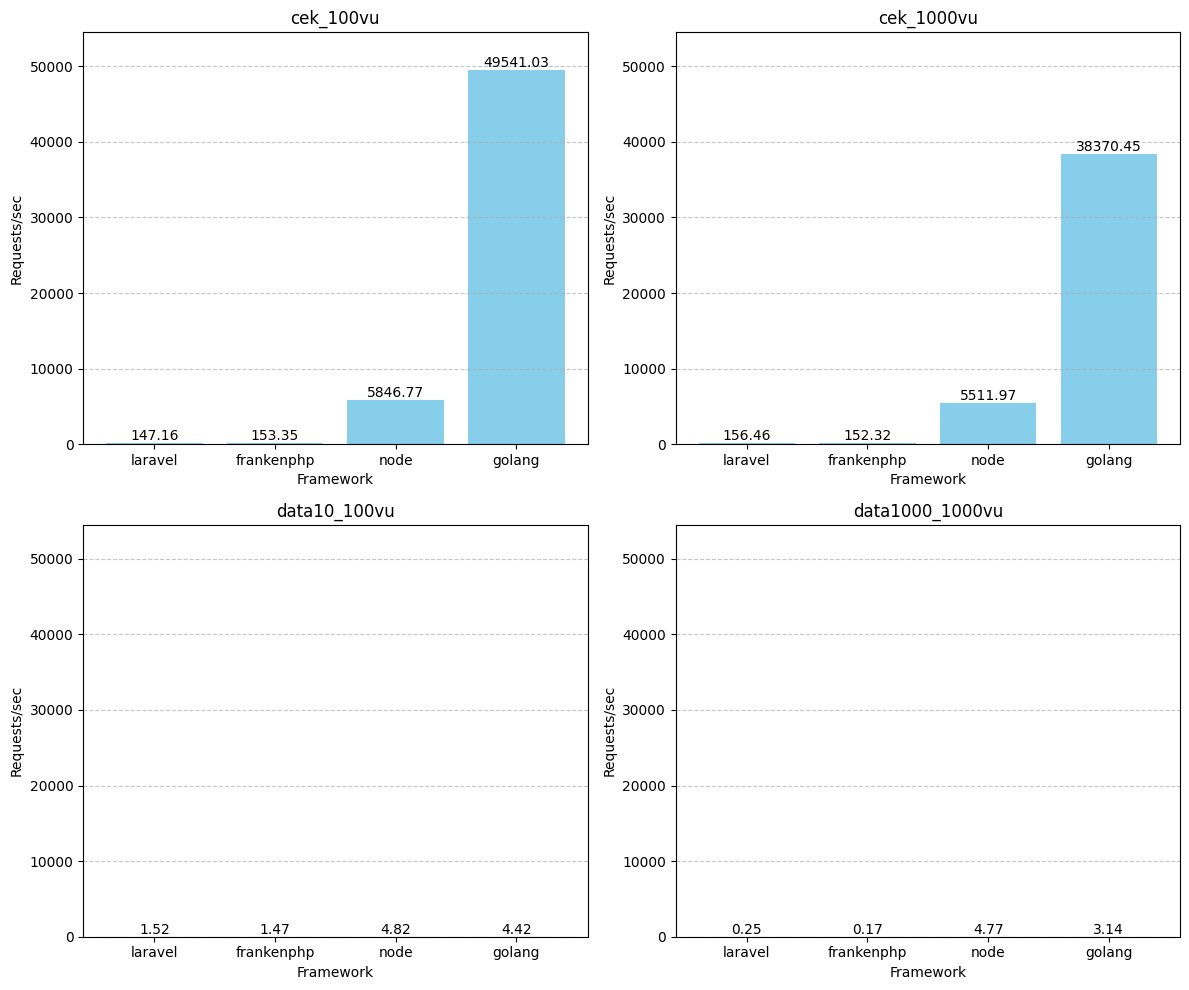

In [22]:
scenarios = df_sorted["Scenario"].cat.categories
num_scenarios = len(scenarios)
cols = 2
rows = (num_scenarios + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))

for i, scenario in enumerate(scenarios):
    ax = axes[i // cols, i % cols]
    subset = df_sorted[df_sorted["Scenario"] == scenario]
    bars = ax.bar(subset["Framework"], subset["RPs"], color="skyblue")
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

    ax.set_title(f"{scenario}")
    ax.set_xlabel("Framework")
    ax.set_ylabel("Requests/sec")
    ax.set_ylim(0, max(df_sorted["RPs"]) * 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()
